<div style="text-align: justify; font-size: large">

# Impacto de la deforestación en el regimen de caudales de los rios en Colombia (TEAM 28)

## Actividad : Verificación de la información descargada desde el IDEAM de las estaciones climáticas Principales y Ordinarias

### 0. Liberías

In [47]:
import numpy as np 
import pandas as pd

import geopandas as gpd
import geoplot as geop
import descartes as dsc

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Lectura de datos y revisiones de estructura y tipos

### 1.1 Lectura y consolidación

**Estaciones climátics ordinarias:**

In [2]:
%%time
#index_col=['CodigoEstacion','Etiqueta','Fecha'], \

climatica_ord = pd.read_csv('data/climatica_ordinaria_res.zip', low_memory = True, \
                            usecols = ['CodigoEstacion','Etiqueta','Fecha','Frecuencia', 'Valor','Grado'],\
                            parse_dates = ['Fecha'], compression = 'zip')

climatica_ord.columns = ['cod_estacion', 'variable', 'frecuencia', 'fecha', 'valor', 'grado']

CPU times: user 3.54 s, sys: 152 ms, total: 3.7 s
Wall time: 3.71 s


In [3]:
climatica_ord.head(10)

,cod_estacion,variable,frecuencia,fecha,valor,grado
0,11025010,TMN_CON,Diaria,1991-01-01,11.6,50
1,11025010,TMN_CON,Diaria,1991-01-02,12.2,50
2,11025010,TMN_CON,Diaria,1991-01-03,13.6,50
3,11025010,TMN_CON,Diaria,1991-01-04,13.0,50
4,11025010,TMN_CON,Diaria,1991-01-05,13.6,50
5,11025010,TMN_CON,Diaria,1991-01-06,14.0,50
6,11025010,TMN_CON,Diaria,1991-01-07,13.8,50
7,11025010,TMN_CON,Diaria,1991-01-08,13.2,50
8,11025010,TMN_CON,Diaria,1991-01-09,14.2,50
9,11025010,TMN_CON,Diaria,1991-01-10,11.4,50


In [4]:
climatica_ord.dtypes # Tipos de datos de las columnas

cod_estacion             int64
variable                object
frecuencia              object
fecha           datetime64[ns]
valor                  float64
grado                    int64
dtype: object

In [5]:
climatica_ord.shape

(3990276, 6)

In [6]:
%%time

estaciones = pd.read_csv('data/EstClimOrd_316Cuencas.csv', header = None, \
                          skiprows = 1, delimiter = '|')

estaciones.columns = ['tipo_estacion', 'cod_estacion', 'msnm', 'cuenca']

CPU times: user 3.2 ms, sys: 193 µs, total: 3.39 ms
Wall time: 4.47 ms


In [7]:
estaciones.head(10)

,tipo_estacion,cod_estacion,msnm,cuenca
0,Clima Ord,11025010,2018,198
1,Clima Ord,11030010,72,197
2,Clima Ord,11045010,75,311
3,Clima Ord,11050020,25,193
4,Clima Ord,11075020,1833,195
5,Clima Ord,11080010,15,193
6,Clima Ord,11115020,1294,191
7,Clima Ord,11115040,1396,191
8,Clima Ord,11120040,8,191
9,Clima Ord,12015010,132,179


In [8]:
estaciones.dtypes # Tipos de datos de las columnas

tipo_estacion    object
cod_estacion      int64
msnm              int64
cuenca            int64
dtype: object

In [9]:
estaciones.shape

(303, 4)

In [10]:
climatica_ord = climatica_ord.merge(estaciones, how = 'left', on = 'cod_estacion', \
                                    copy = True)

In [11]:
climatica_ord.head(10)

,cod_estacion,variable,frecuencia,fecha,valor,grado,tipo_estacion,msnm,cuenca
0,11025010,TMN_CON,Diaria,1991-01-01,11.6,50,Clima Ord,2018.0,198.0
1,11025010,TMN_CON,Diaria,1991-01-02,12.2,50,Clima Ord,2018.0,198.0
2,11025010,TMN_CON,Diaria,1991-01-03,13.6,50,Clima Ord,2018.0,198.0
3,11025010,TMN_CON,Diaria,1991-01-04,13.0,50,Clima Ord,2018.0,198.0
4,11025010,TMN_CON,Diaria,1991-01-05,13.6,50,Clima Ord,2018.0,198.0
5,11025010,TMN_CON,Diaria,1991-01-06,14.0,50,Clima Ord,2018.0,198.0
6,11025010,TMN_CON,Diaria,1991-01-07,13.8,50,Clima Ord,2018.0,198.0
7,11025010,TMN_CON,Diaria,1991-01-08,13.2,50,Clima Ord,2018.0,198.0
8,11025010,TMN_CON,Diaria,1991-01-09,14.2,50,Clima Ord,2018.0,198.0
9,11025010,TMN_CON,Diaria,1991-01-10,11.4,50,Clima Ord,2018.0,198.0


In [12]:
climatica_ord.shape

(3990276, 9)

**Estaciones climáticas principales:**

In [13]:
%%time

climatica_ppal = pd.read_csv('data/climatica_principal_res.zip', low_memory = True, \
                            usecols = ['CodigoEstacion','Etiqueta','Fecha','Frecuencia', 'Valor','Grado'],\
                            parse_dates = ['Fecha'], compression = 'zip')

climatica_ppal.columns = ['cod_estacion', 'variable', 'frecuencia', 'fecha', 'valor', 'grado']

CPU times: user 1.36 s, sys: 12.1 ms, total: 1.37 s
Wall time: 1.37 s


In [14]:
climatica_ppal.head(10)

,cod_estacion,variable,frecuencia,fecha,valor,grado
0,12045010,TMN_CON,Diaria,1991-01-01,20.8,50
1,12045010,TMN_CON,Diaria,1991-01-02,24.2,50
2,12045010,TMN_CON,Diaria,1991-01-03,22.2,50
3,12045010,TMN_CON,Diaria,1991-01-04,21.2,50
4,12045010,TMN_CON,Diaria,1991-01-05,20.0,50
5,12045010,TMN_CON,Diaria,1991-01-06,26.8,50
6,12045010,TMN_CON,Diaria,1991-01-07,26.6,50
7,12045010,TMN_CON,Diaria,1991-01-08,25.6,50
8,12045010,TMN_CON,Diaria,1991-01-09,26.4,50
9,12045010,TMN_CON,Diaria,1991-01-10,27.2,50


In [15]:
climatica_ppal.dtypes

cod_estacion             int64
variable                object
frecuencia              object
fecha           datetime64[ns]
valor                  float64
grado                    int64
dtype: object

In [16]:
climatica_ppal.shape

(1240194, 6)

In [17]:
%%time

estaciones = pd.read_csv('data/EstClimPrinc_316Cuencas.csv', header = None, \
                          skiprows = 1, delimiter = '|')

estaciones.columns = ['tipo_estacion', 'cod_estacion', 'msnm', 'cuenca']

CPU times: user 2.6 ms, sys: 155 µs, total: 2.76 ms
Wall time: 3.85 ms


In [18]:
estaciones.head(10)

,tipo_estacion,cod_estacion,msnm,cuenca
0,Clima Ppal,12045010,40,175
1,Clima Ppal,13085010,20,174
2,Clima Ppal,13095020,200,168
3,Clima Ppal,14015010,20,307
4,Clima Ppal,14015030,1000,307
5,Clima Ppal,15015060,2200,296
6,Clima Ppal,15065040,170,202
7,Clima Ppal,15075030,1,187
8,Clima Ppal,15085020,85,185
9,Clima Ppal,16015090,2500,167


In [19]:
estaciones.dtypes

tipo_estacion    object
cod_estacion      int64
msnm              int64
cuenca            int64
dtype: object

In [20]:
estaciones.shape

(106, 4)

In [21]:
climatica_ppal = climatica_ppal.merge(estaciones, how = 'left', on = 'cod_estacion', \
                                      copy = True)

In [22]:
climatica_ppal.head(10)

,cod_estacion,variable,frecuencia,fecha,valor,grado,tipo_estacion,msnm,cuenca
0,12045010,TMN_CON,Diaria,1991-01-01,20.8,50,Clima Ppal,40.0,175.0
1,12045010,TMN_CON,Diaria,1991-01-02,24.2,50,Clima Ppal,40.0,175.0
2,12045010,TMN_CON,Diaria,1991-01-03,22.2,50,Clima Ppal,40.0,175.0
3,12045010,TMN_CON,Diaria,1991-01-04,21.2,50,Clima Ppal,40.0,175.0
4,12045010,TMN_CON,Diaria,1991-01-05,20.0,50,Clima Ppal,40.0,175.0
5,12045010,TMN_CON,Diaria,1991-01-06,26.8,50,Clima Ppal,40.0,175.0
6,12045010,TMN_CON,Diaria,1991-01-07,26.6,50,Clima Ppal,40.0,175.0
7,12045010,TMN_CON,Diaria,1991-01-08,25.6,50,Clima Ppal,40.0,175.0
8,12045010,TMN_CON,Diaria,1991-01-09,26.4,50,Clima Ppal,40.0,175.0
9,12045010,TMN_CON,Diaria,1991-01-10,27.2,50,Clima Ppal,40.0,175.0


In [23]:
climatica_ppal.shape

(1240194, 9)

### 1.2 Creación de variables soporte para análisis 

**<u>Años - Meses - días</u>**

In [24]:
climatica_ord['year'] = pd.DatetimeIndex(climatica_ord['fecha']).year
climatica_ord['month'] = pd.DatetimeIndex(climatica_ord['fecha']).month
climatica_ord['day'] = pd.DatetimeIndex(climatica_ord['fecha']).day

climatica_ord.head(5)

,cod_estacion,variable,frecuencia,fecha,valor,grado,tipo_estacion,msnm,cuenca,year,month,day
0,11025010,TMN_CON,Diaria,1991-01-01,11.6,50,Clima Ord,2018.0,198.0,1991,1,1
1,11025010,TMN_CON,Diaria,1991-01-02,12.2,50,Clima Ord,2018.0,198.0,1991,1,2
2,11025010,TMN_CON,Diaria,1991-01-03,13.6,50,Clima Ord,2018.0,198.0,1991,1,3
3,11025010,TMN_CON,Diaria,1991-01-04,13.0,50,Clima Ord,2018.0,198.0,1991,1,4
4,11025010,TMN_CON,Diaria,1991-01-05,13.6,50,Clima Ord,2018.0,198.0,1991,1,5


In [25]:
climatica_ppal['year'] = pd.DatetimeIndex(climatica_ppal['fecha']).year
climatica_ppal['month'] = pd.DatetimeIndex(climatica_ppal['fecha']).month
climatica_ppal['day'] = pd.DatetimeIndex(climatica_ppal['fecha']).day

climatica_ppal.head(5)

,cod_estacion,variable,frecuencia,fecha,valor,grado,tipo_estacion,msnm,cuenca,year,month,day
0,12045010,TMN_CON,Diaria,1991-01-01,20.8,50,Clima Ppal,40.0,175.0,1991,1,1
1,12045010,TMN_CON,Diaria,1991-01-02,24.2,50,Clima Ppal,40.0,175.0,1991,1,2
2,12045010,TMN_CON,Diaria,1991-01-03,22.2,50,Clima Ppal,40.0,175.0,1991,1,3
3,12045010,TMN_CON,Diaria,1991-01-04,21.2,50,Clima Ppal,40.0,175.0,1991,1,4
4,12045010,TMN_CON,Diaria,1991-01-05,20.0,50,Clima Ppal,40.0,175.0,1991,1,5


**<u>Calendario para controlar los días sin lecturas</u>**

In [26]:
calendario = pd.DataFrame(pd.date_range(start = '1/1/1990', end = '31/12/2018'))
calendario.columns = ['fecha']

calendario['year_cal'] = pd.DatetimeIndex(calendario['fecha']).year
calendario['month_cal'] = pd.DatetimeIndex(calendario['fecha']).month
calendario['day_cal'] = pd.DatetimeIndex(calendario['fecha']).day

calendario.head(5)

,fecha,year_cal,month_cal,day_cal
0,1990-01-01,1990,1,1
1,1990-01-02,1990,1,2
2,1990-01-03,1990,1,3
3,1990-01-04,1990,1,4
4,1990-01-05,1990,1,5


In [27]:
calendario.shape

(10592, 4)

### 1.3 Consolidación de calendarios con climáticas

In [28]:
calendar_climaticas_ppal = calendario.merge(climatica_ppal, how = 'left', on = 'fecha')
calendar_climaticas_ppal.head(10)

,fecha,year_cal,month_cal,day_cal,cod_estacion,variable,frecuencia,valor,grado,tipo_estacion,msnm,cuenca,year,month,day
0,1990-01-01,1990,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,1990,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-03,1990,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-04,1990,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-05,1990,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1990-01-06,1990,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1990-01-07,1990,1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1990-01-08,1990,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1990-01-09,1990,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1990-01-10,1990,1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
calendar_climaticas_ord = calendario.merge(climatica_ord, how = 'left', on = 'fecha')
calendar_climaticas_ord.head(10)

,fecha,year_cal,month_cal,day_cal,cod_estacion,variable,frecuencia,valor,grado,tipo_estacion,msnm,cuenca,year,month,day
0,1990-01-01,1990,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,1990,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-03,1990,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-04,1990,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-05,1990,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1990-01-06,1990,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1990-01-07,1990,1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1990-01-08,1990,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1990-01-09,1990,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1990-01-10,1990,1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Verificaciones de los datos

### 2.1 Estaciones por cuenca con datos

Tamaño :  (110,)


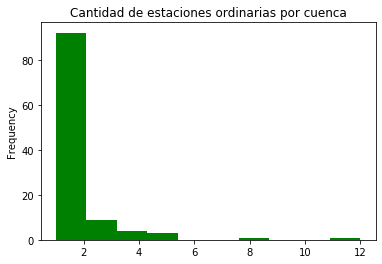

In [30]:
temp = calendar_climaticas_ord[calendar_climaticas_ord['cod_estacion'].notna()].groupby(['cuenca']).cod_estacion.nunique()

temp.plot.hist(color = 'green', title = 'Cantidad de estaciones ordinarias por cuenca')

print('Tamaño : ', temp.shape)


<span style="color: red;font-weight:bold">Para las lecturas climaticas_ord alrededor de 90 cuencas del total (110) tienen por lo menos una estación con valores leidos.</span>

Tamaño :  (46,) 

cuenca
17.0    1
20.0    1
23.0    1
31.0    1
32.0    1
Name: cod_estacion, dtype: int64


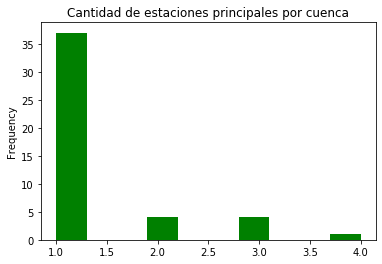

In [31]:
temp = calendar_climaticas_ppal[calendar_climaticas_ppal['cod_estacion'].notna()].groupby(['cuenca']).cod_estacion.nunique()

temp.plot.hist(color = 'green', title = 'Cantidad de estaciones principales por cuenca')

print('Tamaño : ', temp.shape, '\n')
print(temp.head())

<span style="color: red;font-weight:bold">Para las lecturas climaticas_ppal alrededor de 35 cuencas del total (46) tienen por lo menos una estación con valores leidos.</span>

### 2.2 Consolidación de la información en un solo data frame para análisis totalizados

In [32]:
climatica = pd.concat([calendar_climaticas_ppal, calendar_climaticas_ord], ignore_index = True)
print('Columnas : ', climatica.columns, '\n')
print('Tamaño : ', climatica.shape, '\n')
climatica.head()

Columnas :  Index(['fecha', 'year_cal', 'month_cal', 'day_cal', 'cod_estacion', 'variable',
       'frecuencia', 'valor', 'grado', 'tipo_estacion', 'msnm', 'cuenca',
       'year', 'month', 'day'],
      dtype='object') 

Tamaño :  (5043155, 15) 



,fecha,year_cal,month_cal,day_cal,cod_estacion,variable,frecuencia,valor,grado,tipo_estacion,msnm,cuenca,year,month,day
0,1990-01-01,1990,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,1990,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-03,1990,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-04,1990,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-05,1990,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tamaño :  (128,) 

cuenca
4.0     2
5.0     1
6.0     3
9.0     2
17.0    2
Name: cod_estacion, dtype: int64


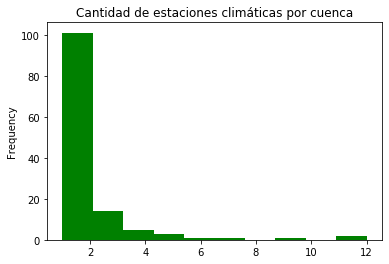

In [33]:
temp = climatica[(climatica['cod_estacion'].notna()) & (climatica['fecha'] >= '2000-01-01')  & (climatica['fecha'] <= '2018-12-31')].groupby(['cuenca']).cod_estacion.nunique()

temp.plot.hist(color = 'green', title = 'Cantidad de estaciones climáticas por cuenca')

print('Tamaño : ', temp.shape, '\n')
print(temp.head())

<span style="color: red;font-weight:bold">Para todas las lecturas climaticas alrededor de 100 cuencas del total (128) tienen por lo menos una estación con valores leidos. Esta consulta se circunscribe al periodo de tiempo entre '2000-01-01' y '2018-12-31'.</span>

### 2.3 Variables por cuenca

Tamaño :  (128,) 

cuenca
4.0     2
5.0     2
6.0     2
9.0     2
17.0    2
Name: variable, dtype: int64


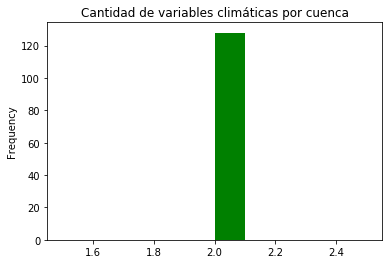

In [43]:
temp = climatica[(climatica['variable'].notna()) & (climatica['fecha'] >= '2000-01-01')  & (climatica['fecha'] <= '2018-12-31')].groupby(['cuenca']).variable.nunique()

temp.plot.hist(color = 'green', title = 'Cantidad de variables climáticas por cuenca')

print('Tamaño : ', temp.shape, '\n')
print(temp.head())

<span style="color: red;font-weight:bold">Todas las 128 cuencas cuentan con dos variables distintas leidas. Esta consulta se circunscribe al periodo de tiempo entre '2000-01-01' y '2018-12-31'.</span>

### 2.4 Cantidad de días leidos por estación y por variable 

**<u>Variable TMN_CON</u>**

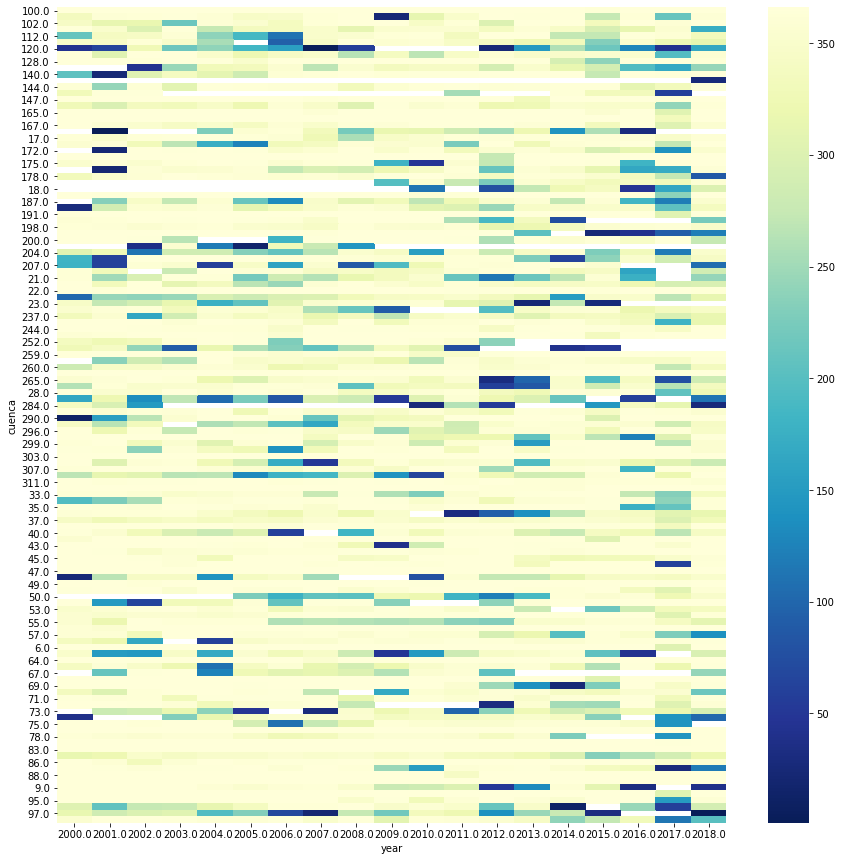

In [35]:
temp = climatica[(climatica['day'].notna()) & (climatica['fecha'] >= '2000-01-01')  & (climatica['fecha'] <= '2018-12-31') & (climatica['variable'] == 'TMN_CON')].groupby(['cuenca','year']).fecha.nunique()
#print(type(temp))
#print(temp.index)

temp = temp.add_suffix('').reset_index()
temp.head(100)

heatmap1_data = pd.pivot_table(temp, values = 'fecha', index=['cuenca'], 
                     columns='year')

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(data = heatmap1_data, cmap = 'YlGnBu_r', ax = ax)


<span style="color: red;font-weight:bold">La densidad del mapa de calor para la variiable  TMN_CON (Temperatura mínima) nos indica que una gran cantidad de las cuencas tienen lecturas de la variable en gran pate del año. Esta consulta se circunscribe al periodo de tiempo entre '2000-01-01' y '2018-12-31'.</span>

**<u>Variable TMX_CON</u>**

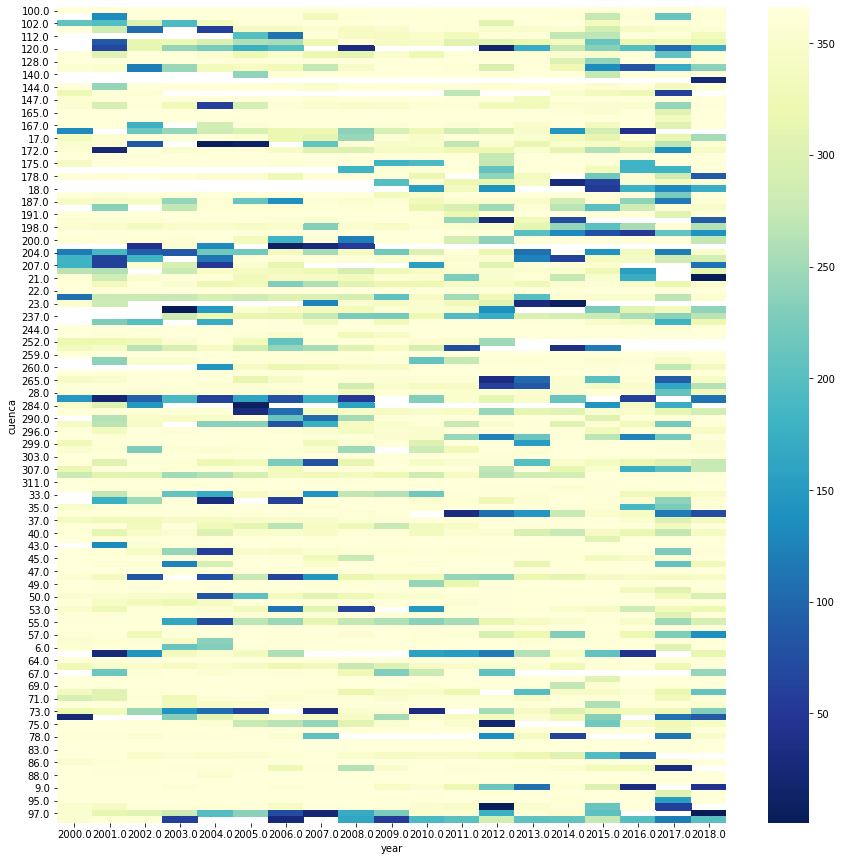

In [36]:
temp = climatica[(climatica['day'].notna()) & (climatica['fecha'] >= '2000-01-01')  & (climatica['fecha'] <= '2018-12-31') & (climatica['variable'] == 'TMX_CON')].groupby(['cuenca','year']).fecha.nunique()
#print(type(temp))
#print(temp.index)

temp = temp.add_suffix('').reset_index()
temp.head(100)

heatmap1_data = pd.pivot_table(temp, values = 'fecha', index=['cuenca'], 
                     columns='year')

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(data = heatmap1_data, cmap = 'YlGnBu_r', ax = ax)

<span style="color: red;font-weight:bold">La densidad del mapa de calor para la variiable  TMX_CON (Temperatura máxima) nos indica que una gran cantidad de las cuencas tienen lecturas de la variable en gran pate del año. Esta consulta se circunscribe al periodo de tiempo entre '2000-01-01' y '2018-12-31'.</span>

### 2.5 Vista geográfica

### 2.5.1 Carga de los archivos geográficos

In [37]:
fp = 'DAMCRA-Subzonas Hidrograficas Colombia/szh_sep_26_2012.shp'

data_geo = gpd.read_file(fp)

In [38]:
print('Tipo de objeto : ', type(data_geo), '\n')
print('Tamaño del objeto : ', data_geo.shape, '\n')

Tipo de objeto :  <class 'geopandas.geodataframe.GeoDataFrame'> 

Tamaño del objeto :  (310, 13) 



In [39]:
data_geo.head(5)

,OBJECTID,AH,NOMAH,ZH,NOMZH,SZH,NOMSZH,Shape_Leng,Shape_Area,CODIGO,omar,cod_nuevo,geometry
0,1,2,Magdalena Cauca,26,Cauca,2602,Rï¿½o Purace,188363.092573,934.252927,0.0,None,2602,"POLYGON ((706856.631 794650.738, 707517.023 79..."
1,2,2,Magdalena Cauca,26,Cauca,2606,Rï¿½o Ovejas,145171.292833,923.951206,0.0,None,2606,"POLYGON ((710772.993 821394.880, 710964.364 82..."
2,3,2,Magdalena Cauca,26,Cauca,2604,Rï¿½o Palo,234428.178825,1650.980036,0.0,None,2604,"POLYGON ((734729.991 858909.746, 734909.887 85..."
3,4,2,Magdalena Cauca,26,Cauca,2607,Rï¿½o Fraile y otros directos al Cauca,186871.719709,1225.433794,0.0,None,2607,"POLYGON ((735452.802 889920.222, 735597.512 88..."
4,5,2,Magdalena Cauca,26,Cauca,2632,"Rï¿½o Guabas, Rï¿½o Sabaletas y rï¿½o Sonso",125666.542431,744.332265,0.0,None,2632,"POLYGON ((771988.978 897962.662, 771877.078 89..."


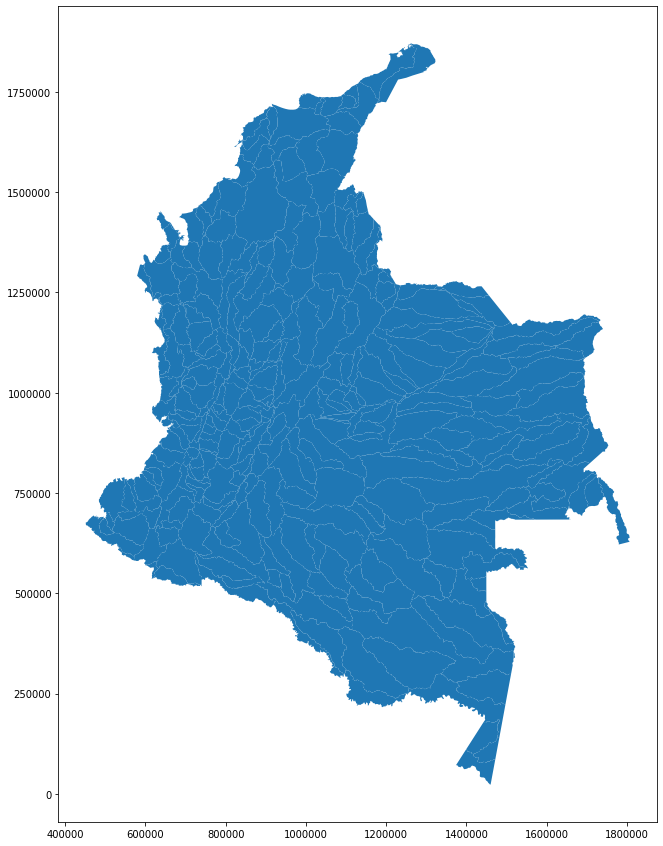

In [51]:
fig, ax = plt.subplots(figsize=(15,15))
data_geo.plot(ax = ax)


</div>